In [4]:
!pip install -q geopandas

    100% |████████████████████████████████| 931kB 19.8MB/s 
    100% |████████████████████████████████| 20.6MB 1.6MB/s 
    100% |████████████████████████████████| 17.9MB 797kB/s 


In [6]:
!pip install -q pycountry

    100% |████████████████████████████████| 10.5MB 1.1MB/s 


In [56]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 27.0MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display propertice
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Date
import datetime

# Maps
import geopandas as gpd
import pycountry

from math import pi

# Display in Jupyter
from IPython.display import display, HTML

In [0]:
# Load dataset

df_fifa19 = pd.read_csv('https://raw.githubusercontent.com/Ritzing/FifaPrediction/master/data.csv')

In [3]:
# Show the first five rows
df_fifa19.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# Show the info about dataset
df_fifa19.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [5]:
df_fifa19.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [6]:
df_fifa19.shape


(18207, 89)

In [7]:
# Number of unique elements in dataset
df_fifa19.nunique()


Unnamed: 0                  18207
ID                          18207
Name                        17194
Age                            29
Photo                       18207
Nationality                   164
Flag                          164
Overall                        48
Potential                      47
Club                          651
Club Logo                     679
Value                         217
Wage                          144
Special                      1422
Preferred Foot                  2
International Reputation        5
Weak Foot                       5
Skill Moves                     5
Work Rate                       9
Body Type                      10
Real Face                       2
Position                       27
Jersey Number                  99
Joined                       1736
Loaned From                   341
Contract Valid Until           36
Height                         21
Weight                         57
LS                             93
ST            

In [8]:
# I check where there are NaN values
df_fifa19.isnull().any()

Unnamed: 0                  False
ID                          False
Name                        False
Age                         False
Photo                       False
Nationality                 False
Flag                        False
Overall                     False
Potential                   False
Club                         True
Club Logo                   False
Value                       False
Wage                        False
Special                     False
Preferred Foot               True
International Reputation     True
Weak Foot                    True
Skill Moves                  True
Work Rate                    True
Body Type                    True
Real Face                    True
Position                     True
Jersey Number                True
Joined                       True
Loaned From                  True
Contract Valid Until         True
Height                       True
Weight                       True
LS                           True
ST            

In [9]:
# What columns are in dataset?
df_fifa19.columns


Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [0]:
# I choose interesting to me columns. Later I will use them for analysis.
chosen_columns = [
    'Name',
    'Age',
    'Nationality',
    'Overall',
    'Potential',
    'Special',
    'Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'BallControl',
    'Body Type',
    'Composure',
    'Crossing',
    'Curve',
    'Club','Dribbling',
    'FKAccuracy',
    'Finishing',
    'GKDiving',
    'GKHandling',
    'GKKicking',
    'GKPositioning',
    'GKReflexes',
    'HeadingAccuracy',
    'Interceptions',
    'International Reputation',
    'Jersey Number',
    'Jumping',
    'Joined',
    'LongPassing',
    'LongShots',
    'Marking',
    'Penalties',
    'Position',
    'Positioning',    
    'Preferred Foot',
    'Reactions',
    'ShortPassing',
    'ShotPower',
    'Skill Moves',
    'SlidingTackle',
    'SprintSpeed',
    'Stamina',
    'StandingTackle',
    'Strength',
    'Value',
    'Vision',
    'Volleys',
    'Wage',
    'Weak Foot',
    'Work Rate'
]

In [0]:
# I create DataFrame with chosen columns
df = pd.DataFrame(df_fifa19, columns = chosen_columns)

In [12]:
# The five random rows
df.sample(5)

,Name,Age,Nationality,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Body Type,Composure,Crossing,Curve,Club,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,International Reputation,Jersey Number,Jumping,Joined,LongPassing,LongShots,Marking,Penalties,Position,Positioning,Preferred Foot,Reactions,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Value,Vision,Volleys,Wage,Weak Foot,Work Rate
12111,S. Hoare,24,Republic of Ireland,63,70,1489,58.0,64.0,50.0,52.0,61.0,Normal,51.0,45.0,35.0,Dundalk,57.0,29.0,24.0,8.0,11.0,15.0,11.0,10.0,57.0,61.0,1.0,4.0,52.0,"Dec 12, 2016",53.0,33.0,62.0,38.0,CB,43.0,Right,54.0,62.0,56.0,2.0,61.0,55.0,61.0,64.0,71.0,€450K,40.0,36.0,€1K,2.0,Medium/ Medium
14300,M. Pawelec,32,Poland,61,61,1629,64.0,70.0,65.0,71.0,62.0,Lean,62.0,50.0,36.0,Śląsk Wrocław,51.0,46.0,41.0,10.0,14.0,10.0,14.0,16.0,54.0,71.0,1.0,17.0,77.0,"Aug 16, 2008",55.0,55.0,56.0,42.0,RB,51.0,Right,52.0,61.0,44.0,2.0,70.0,37.0,61.0,67.0,67.0,€140K,40.0,49.0,€1K,3.0,Medium/ Medium
5350,D. Lainez,18,Mexico,70,82,1804,82.0,50.0,87.0,93.0,72.0,Lean,70.0,60.0,62.0,Club América,77.0,50.0,60.0,14.0,13.0,14.0,7.0,9.0,50.0,29.0,1.0,20.0,52.0,"Jan 1, 2017",61.0,63.0,50.0,66.0,RM,60.0,Left,64.0,71.0,55.0,3.0,51.0,80.0,68.0,54.0,60.0,€2.9M,63.0,57.0,€14K,3.0,High/ Medium
14558,F. Sittsam,23,Austria,61,66,1513,69.0,64.0,45.0,65.0,59.0,Lean,64.0,35.0,39.0,TSV Hartberg,55.0,35.0,32.0,14.0,9.0,8.0,14.0,6.0,58.0,58.0,1.0,5.0,58.0,"Sep 20, 2018",50.0,34.0,61.0,43.0,RDM,39.0,Right,62.0,58.0,35.0,2.0,59.0,64.0,72.0,61.0,72.0,€290K,50.0,30.0,€1K,3.0,Medium/ Medium
17212,L. Hlabi,18,England,55,58,1342,78.0,47.0,54.0,80.0,39.0,Normal,41.0,36.0,39.0,Gillingham,38.0,29.0,49.0,12.0,10.0,7.0,8.0,10.0,49.0,14.0,1.0,29.0,72.0,"Jul 1, 2018",28.0,49.0,12.0,54.0,ST,55.0,Right,58.0,38.0,68.0,2.0,16.0,79.0,66.0,17.0,75.0,€100K,26.0,30.0,€1K,2.0,Medium/ Medium


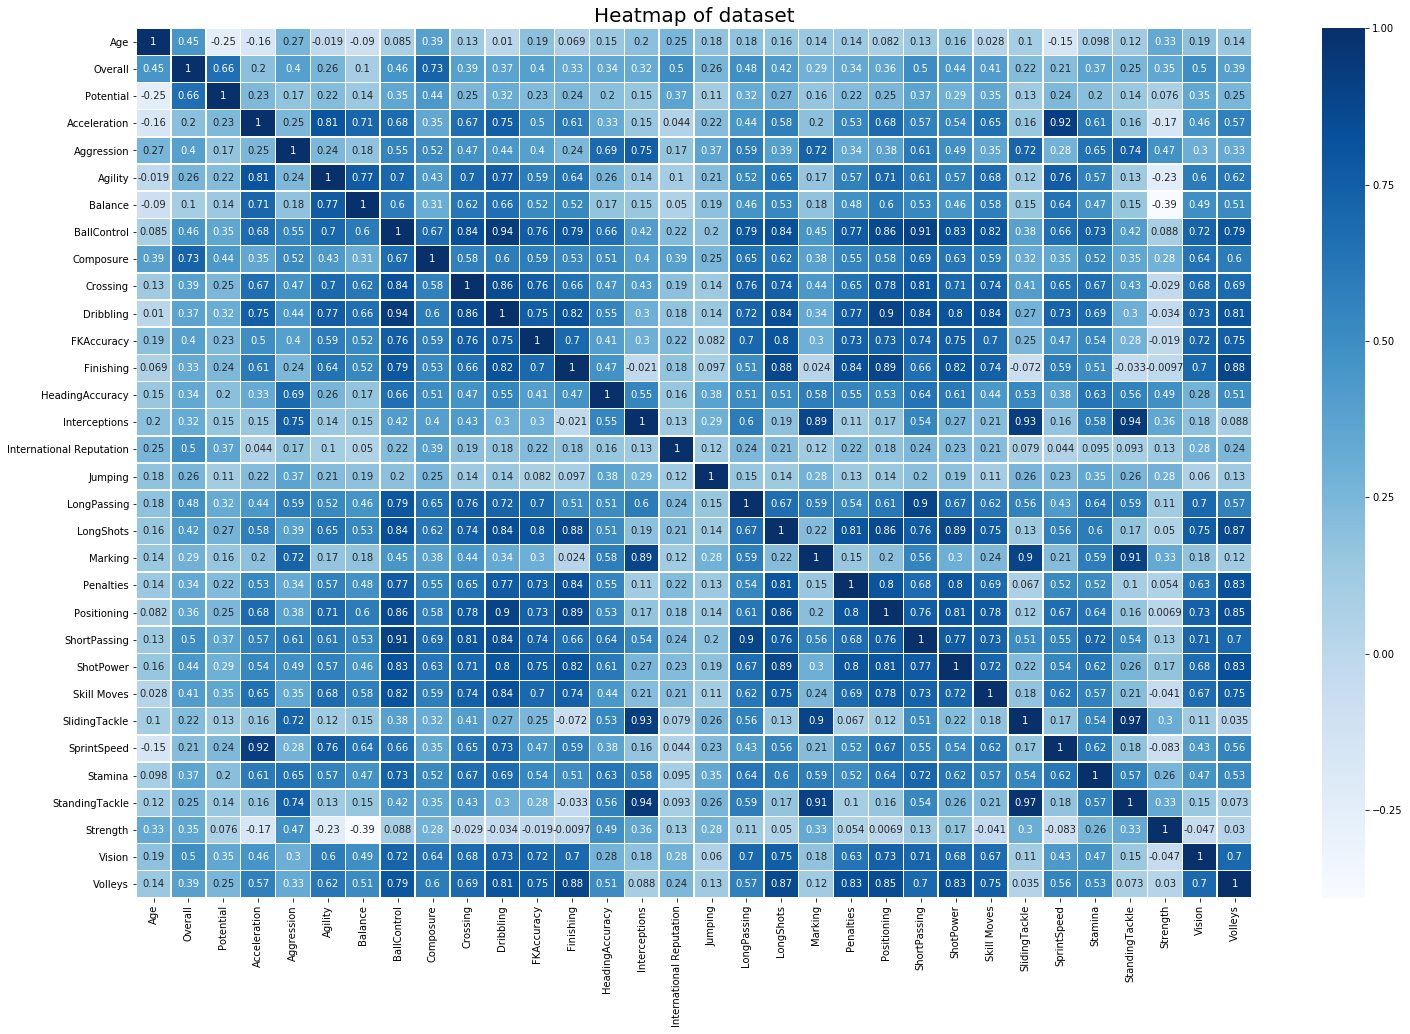

In [13]:
# Correlation heatmap
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

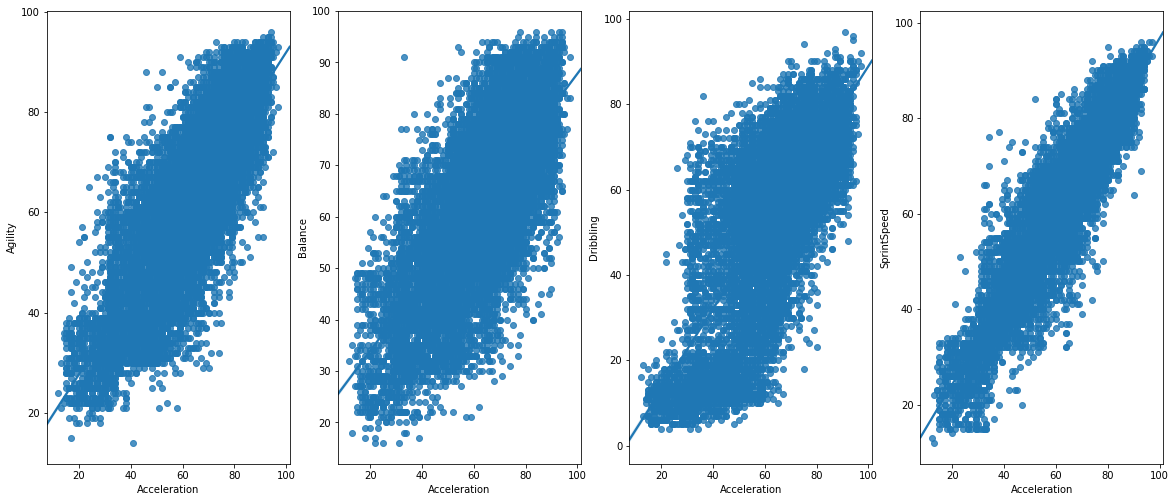

In [14]:
# Scater plot shows correlation between Acceleration and other chosen features
def make_scatter(df):
    feats = ('Agility', 'Balance', 'Dribbling', 'SprintSpeed')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/4+1, 4, index+1)
        ax = sns.regplot(x = 'Acceleration', y = feat, data = df)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.4)

make_scatter(df)

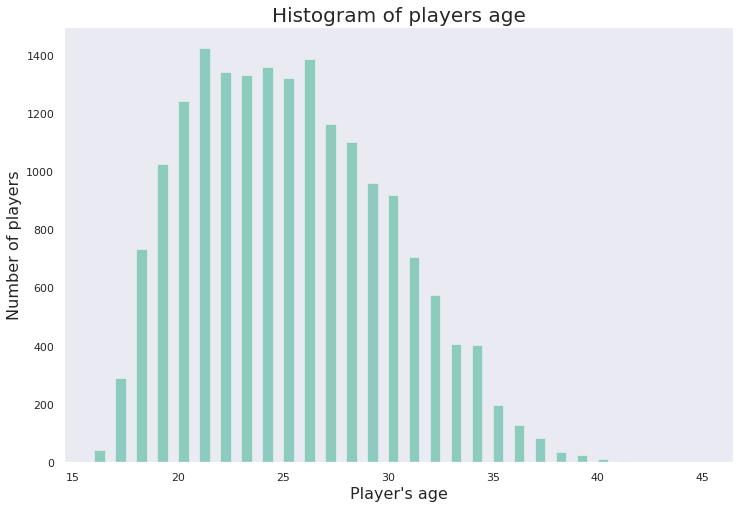

In [15]:
# Histogram: number of players's age
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

In [16]:
# The five eldest players
eldest = df.sort_values('Age', ascending = False)[['Name', 'Nationality', 'Age']].head(3)
eldest.set_index('Name', inplace=True)
print(eldest)

                     Nationality  Age
Name                                 
O. Pérez                  Mexico   45
K. Pilkington            England   44
T. Warner      Trinidad & Tobago   44


In [17]:
eldest = df.sort_values('Age', ascending = True)[['Name', 'Nationality', 'Age']].head(22)
eldest.set_index('Name', inplace=True)
print(eldest)

                         Nationality  Age
Name                                     
G. Nugent                    England   16
J. Olstad                     Norway   16
H. Massengo                   France   16
J. Italiano                Australia   16
N. Ayéva                      Sweden   16
K. Broda                      Poland   16
L. D'Arrigo                Australia   16
Y. Verschaeren               Belgium   16
B. Nygren                     Sweden   16
B. O'Gorman      Republic of Ireland   16
A. Doğan                      Turkey   16
C. Bassett             United States   16
J. Lahne                      Sweden   16
Y. Begraoui                   France   16
B. Mumba                     England   16
J. Imbrechts                  Sweden   16
J. Cleary        Republic of Ireland   16
R. Gómez                   Argentina   16
H. Andersson                  Sweden   16
M. Larsen                    Denmark   16
J. Kitolano                   Norway   16
P. Samiec-Talar               Pola

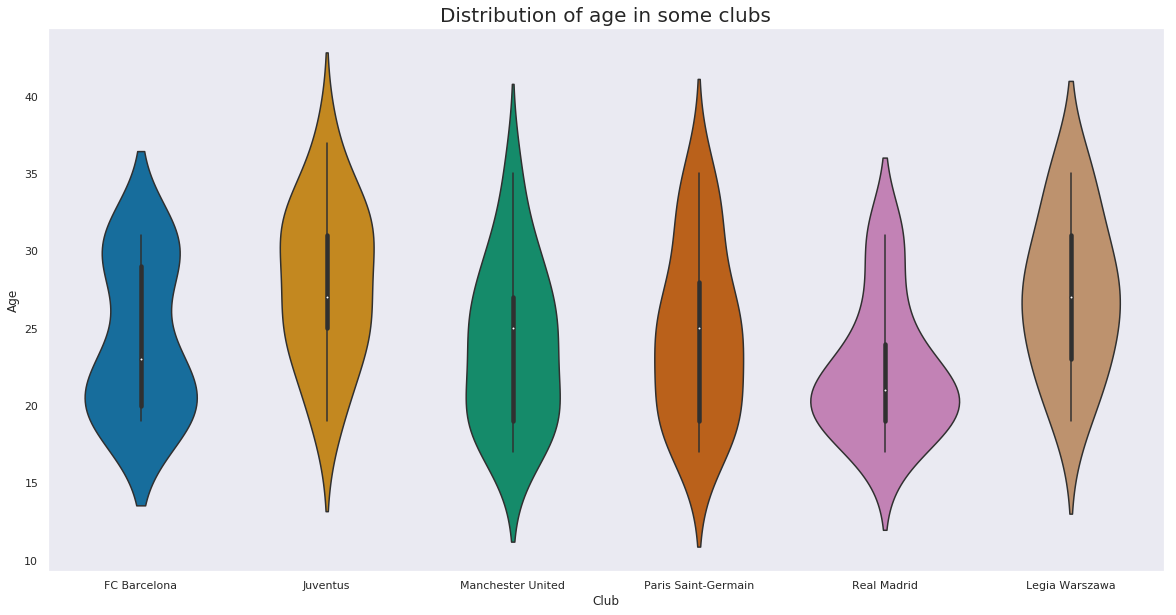

In [18]:
# Compare six clubs in relation to age
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Legia Warszawa', 'Manchester United')
df_club = df.loc[df['Club'].isin(some_clubs) & df['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x="Club", y="Age", data=df_club);
ax.set_title(label='Distribution of age in some clubs', fontsize=20);

In [19]:
# The longest membership in the club
now = datetime.datetime.now()
df['Join_year'] = df.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
df['Years_of_member'] = (df.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int').dropna()
membership = df[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).dropna().head()
membership.set_index('Name', inplace=True)
membership

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,28.0
M. Ogasawara,Kashima Antlers,21.0
H. Sogahata,Kashima Antlers,21.0
M. Al Shalhoub,Al Hilal,21.0
S. Narazaki,Nagoya Grampus,20.0


In [20]:
# The oldest team
df.groupby(['Club'])['Age'].sum().sort_values(ascending = False).head(5)

Club
Cardiff City     863
Villarreal CF    851
Burnley          850
Frosinone        843
Chelsea          832
Name: Age, dtype: int64

In [21]:
# The youngest team
df.groupby(['Club'])['Age'].sum().sort_values(ascending = True).head(5)

Club
Derry City      398
Sligo Rovers    421
Limerick FC     436
Tromsø IL       476
FK Haugesund    508
Name: Age, dtype: int64

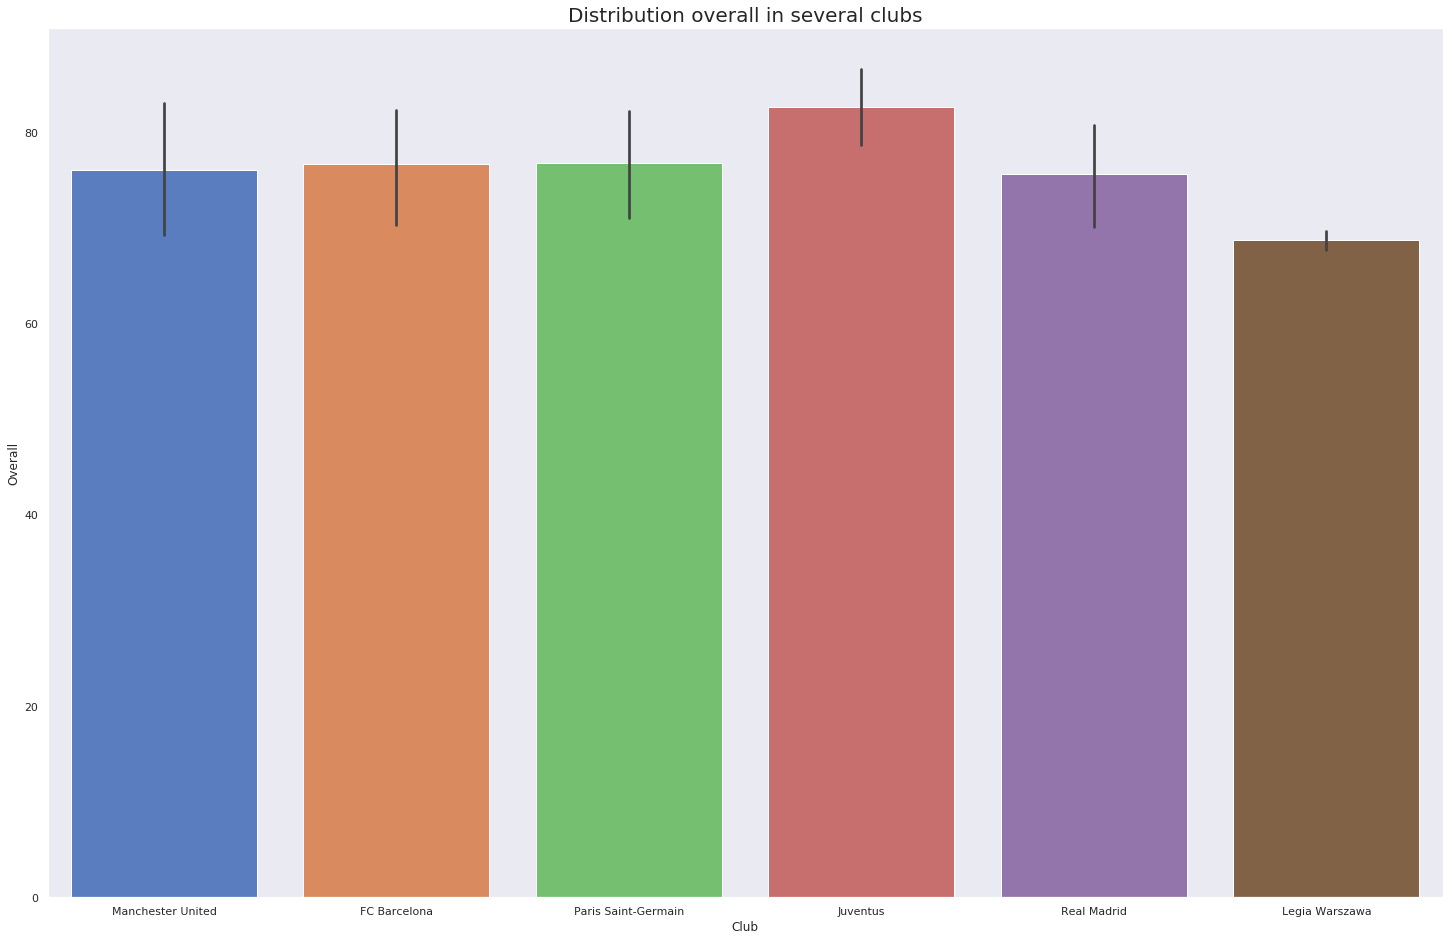

In [22]:
# The clubs and their players overalls
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Legia Warszawa', 'Manchester United')
df_club = df.loc[df['Club'].isin(some_clubs) & df['Age'] & df['Overall'] ]

ax = sns.barplot(x=df_club['Club'], y=df_club['Overall'], palette="muted");
ax.set_title(label='Distribution overall in several clubs', fontsize=20);

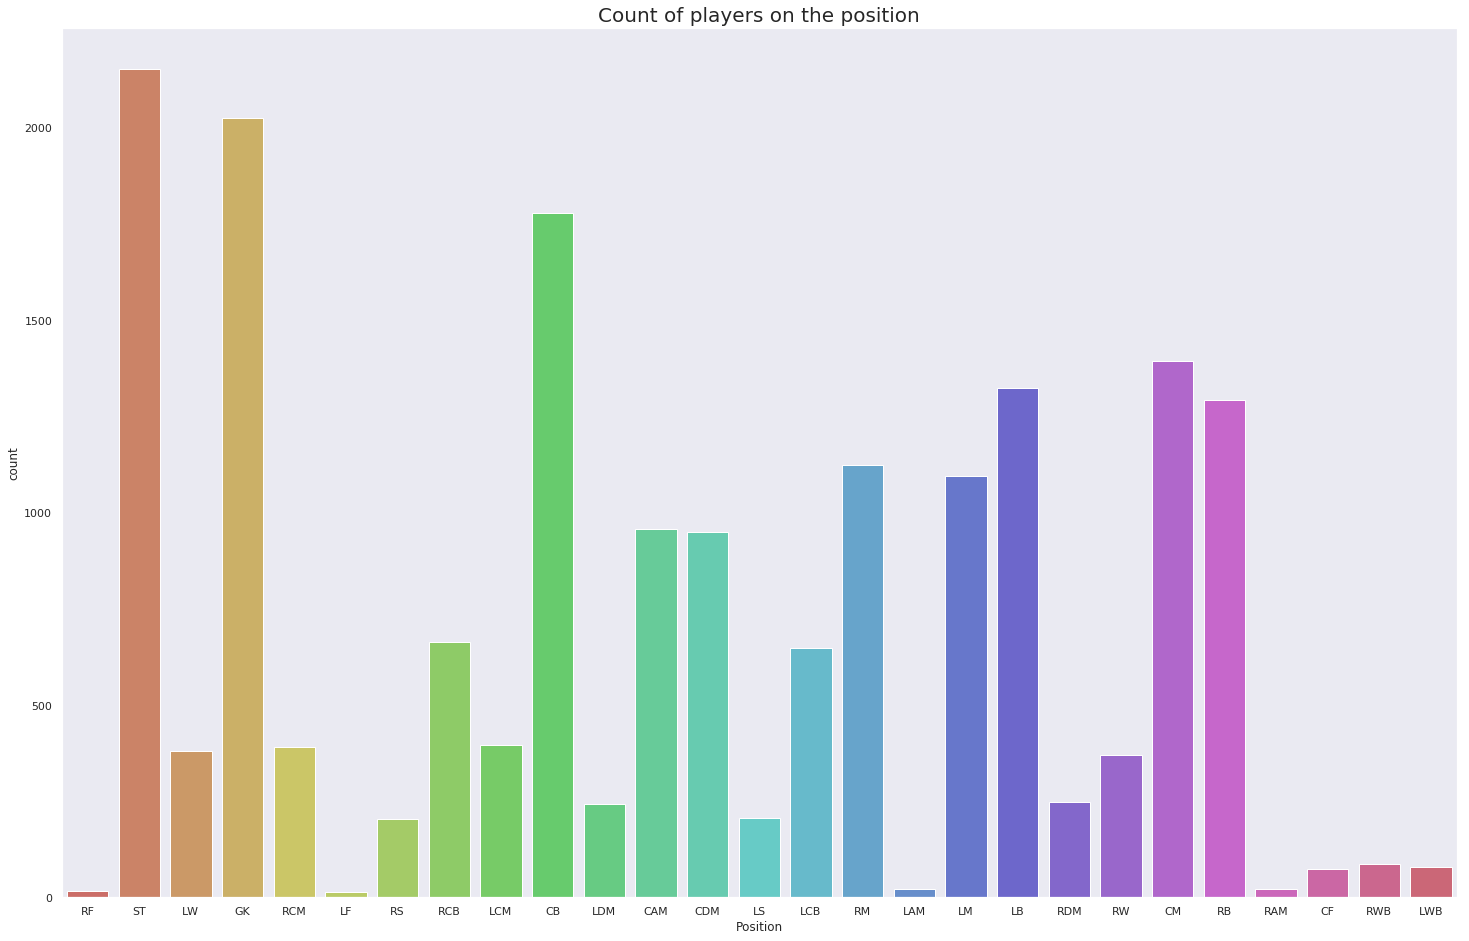

In [24]:
# All of position
ax = sns.countplot(x = 'Position', data = df, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

In [25]:
# The best player per position
display(HTML(df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Name', 'Position']].to_html(index=False)))

Name,Position
A. Griezmann,CAM
D. Godín,CB
Sergio Busquets,CDM
Luis Alberto,CF
Thiago,CM
De Gea,GK
J. Rodríguez,LAM
Marcelo,LB
G. Chiellini,LCB
T. Kroos,LCM


In [26]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

# Top three features per position
for i, val in df.groupby(df['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

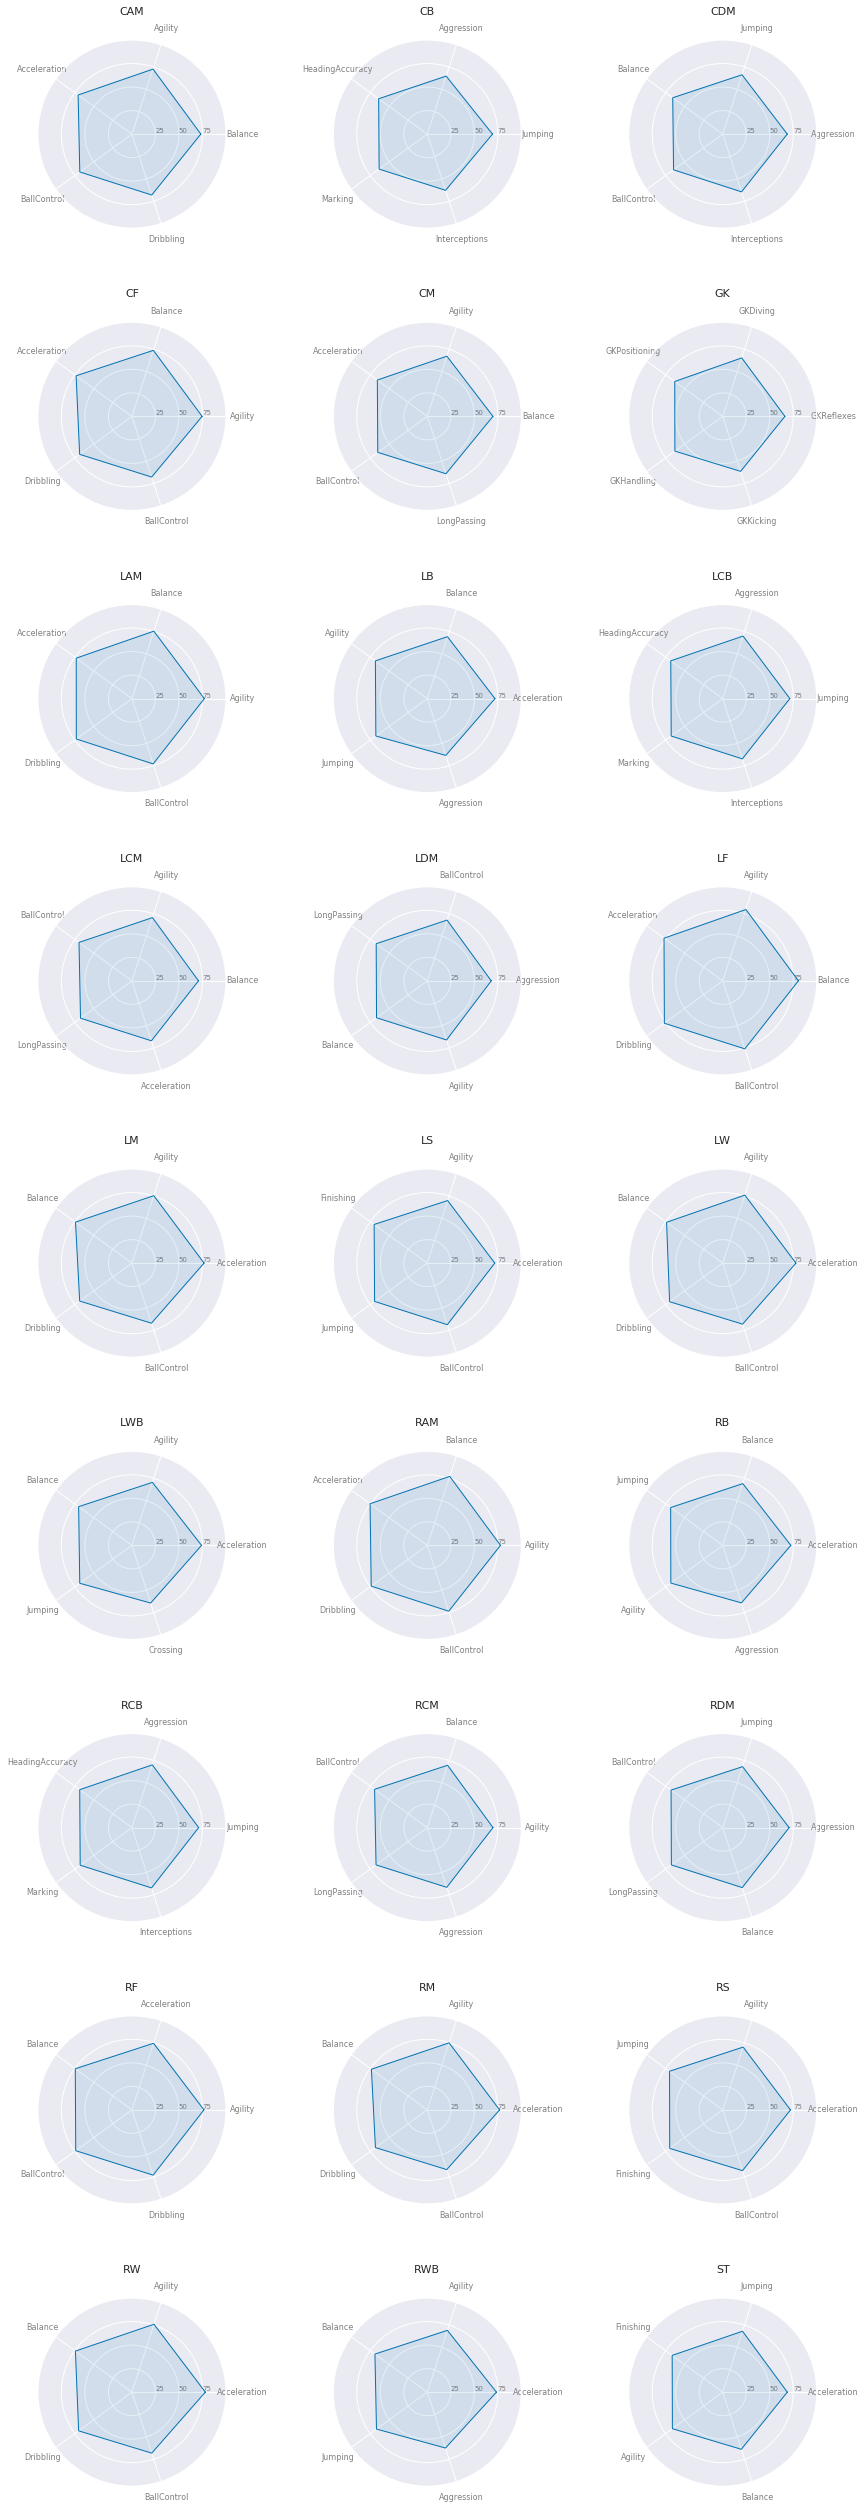

In [27]:
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)
      # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

In [37]:
# Top 5 left-footed players
df[df['Preferred Foot'] == 'Left'][['Name','Overall']].head()

,Name,Overall
0,L. Messi,94
13,David Silva,90
15,P. Dybala,89
17,A. Griezmann,89
19,T. Courtois,89


In [28]:
# Top 5 right-footed players
df[df['Preferred Foot'] == 'Right'][['Name','Overall']].head()

,Name,Overall
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91


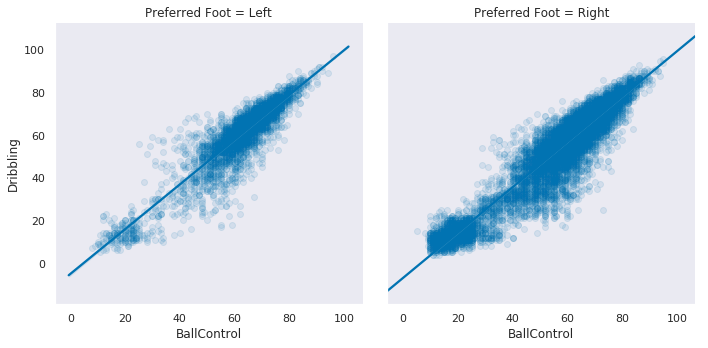

In [29]:
# Better is left-footed or rigth-footed players?
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,
          scatter_kws = {'alpha':0.1},
          col = 'Preferred Foot');

In [30]:
# The clubs, where have players mainly from one country
clubs_coherency = pd.Series()
for club, players in df.groupby(['Club'])['Nationality'].count().items():
    coherency = df[df['Club'] == club].groupby(['Nationality'])['Club'].count().max() / players * 100
    clubs_coherency[club] = coherency

clubs_coherency.sort_values(ascending = False).head(23)


CA Osasuna                   100.000000
Ceará Sporting Club          100.000000
Botafogo                     100.000000
Vitória                      100.000000
Internacional                100.000000
Sangju Sangmu FC             100.000000
Santos                       100.000000
Guadalajara                  100.000000
Grêmio                       100.000000
Atlético Paranaense          100.000000
Sport Club do Recife         100.000000
Fluminense                   100.000000
Ranheim Fotball              100.000000
Chapecoense                  100.000000
Cittadella                   100.000000
Cork City                    100.000000
Bahia                        100.000000
Cruzeiro                     100.000000
Paraná                       100.000000
Atlético Mineiro             100.000000
América FC (Minas Gerais)    100.000000
Padova                       100.000000
Athletic Club de Bilbao       96.774194
dtype: float64

In [31]:
# The clubs with largest number of different countries
df.groupby(['Club'])['Nationality'].nunique().sort_values(ascending = False).head()

Club
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
Lazio                     18
Empoli                    18
Name: Nationality, dtype: int64

In [32]:
# The clubs with the smallest number of foreigners players
df.groupby(['Club'])['Nationality'].nunique().sort_values().head()

Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Name: Nationality, dtype: int64

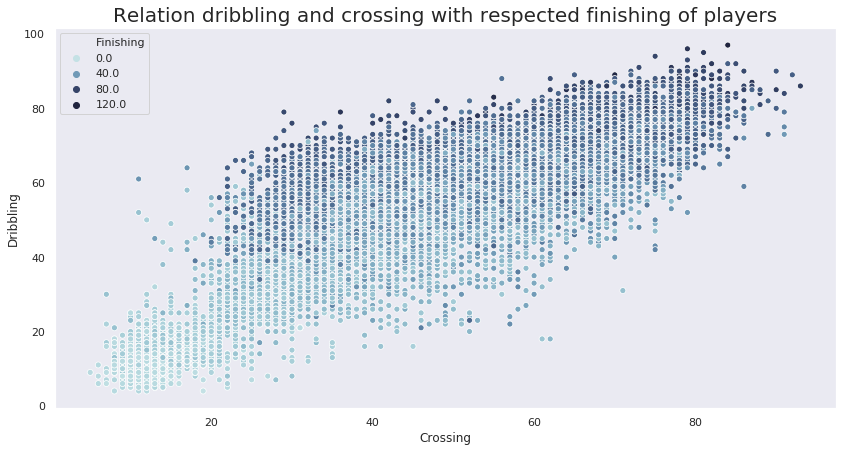

In [33]:
# Relation dribbling and crossing with respected finishing of players
plt.figure(figsize=(14,7))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x='Crossing', y='Dribbling',hue='Finishing', palette=cmap, sizes=(1, 1),data=df)
ax.set_title(label='Relation dribbling and crossing with respected finishing of players', fontsize=20);

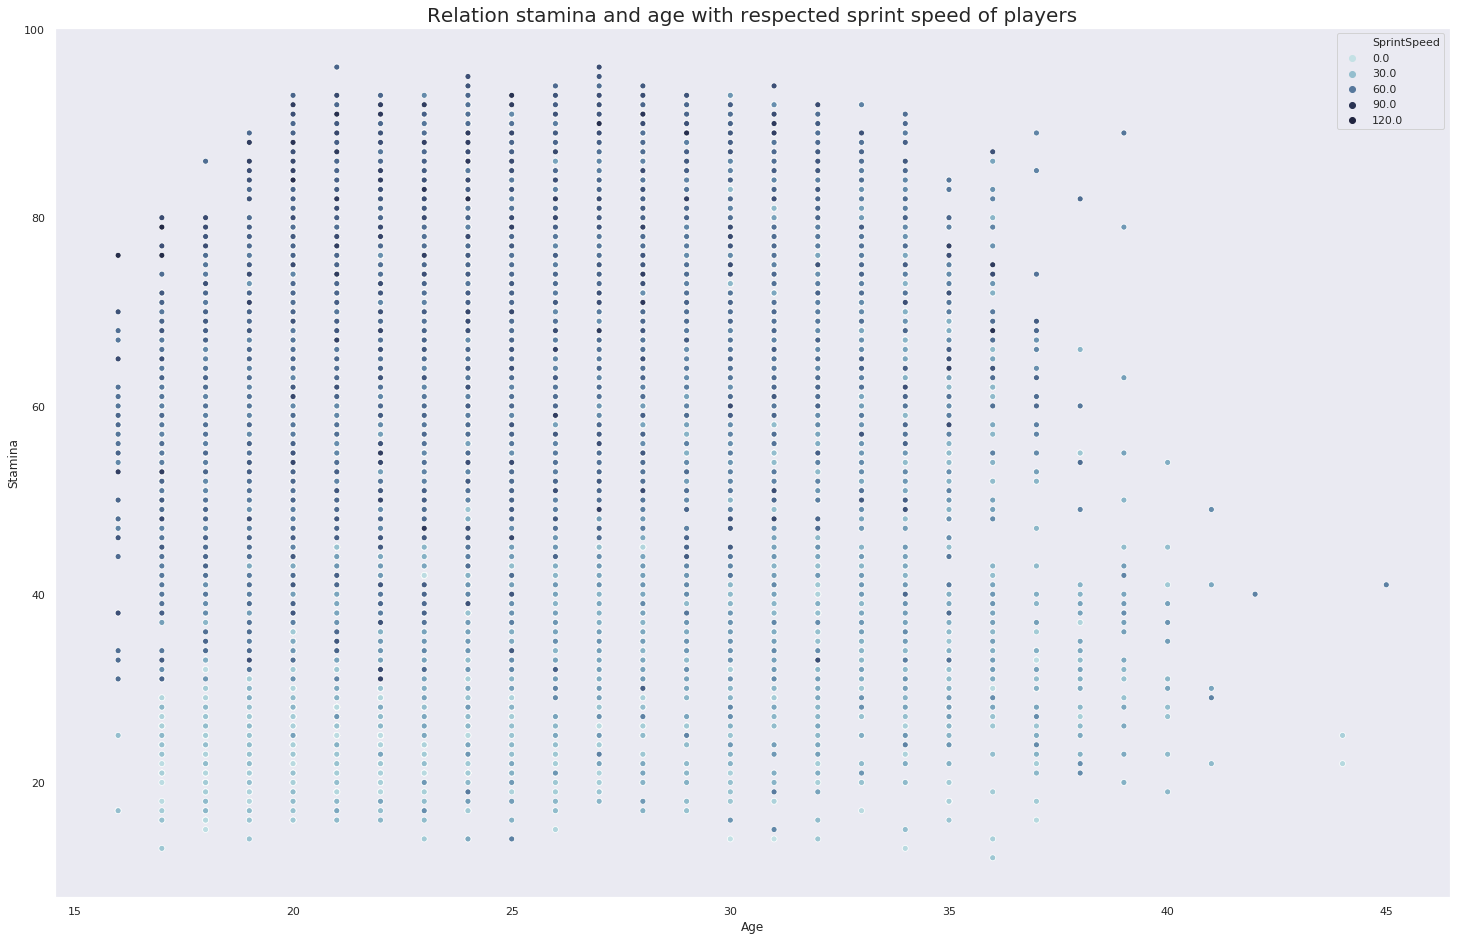

In [34]:
# Relation stamina and age with respected sprint speed of players
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x='Age', y='Stamina',
                     hue='SprintSpeed',
                     palette=cmap, sizes=(1, 1),
                     data=df)
ax.set_title(label='Relation stamina and age with respected sprint speed of players', fontsize=20);

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


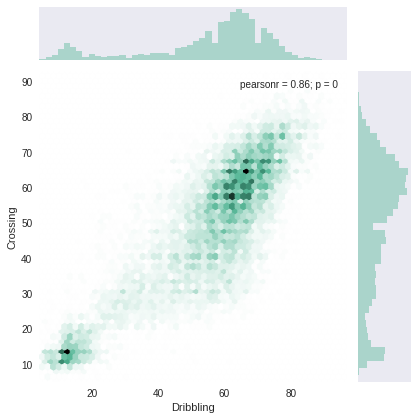

In [45]:
# Crossing vs. dribbling
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391");

In [0]:
# The value has some non numeric mark so I extract rigth value
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value_float'] = df['Value'].apply(value_to_int)

In [38]:
# Top five the most expensive clubs
df.groupby(['Club'])['Value_float'].sum().sort_values(ascending = False).head(5)

Club
Real Madrid          874425000.0
FC Barcelona         852600000.0
Manchester City      786555000.0
Juventus             704475000.0
FC Bayern München    679025000.0
Name: Value_float, dtype: float64

In [39]:
# Top five the less expensive clubs
df.groupby(['Club'])['Value_float'].sum().sort_values().head(5)

Club
Bray Wanderers    1930000.0
Limerick FC       2040000.0
Derry City        2795000.0
Bohemian FC       3195000.0
Sligo Rovers      3295000.0
Name: Value_float, dtype: float64

In [40]:
# Top five teams with the best players
df.groupby(['Club'])['Overall'].max().sort_values(ascending = False).head()

Club
Juventus               94
FC Barcelona           94
Paris Saint-Germain    92
Manchester City        91
Chelsea                91
Name: Overall, dtype: int64

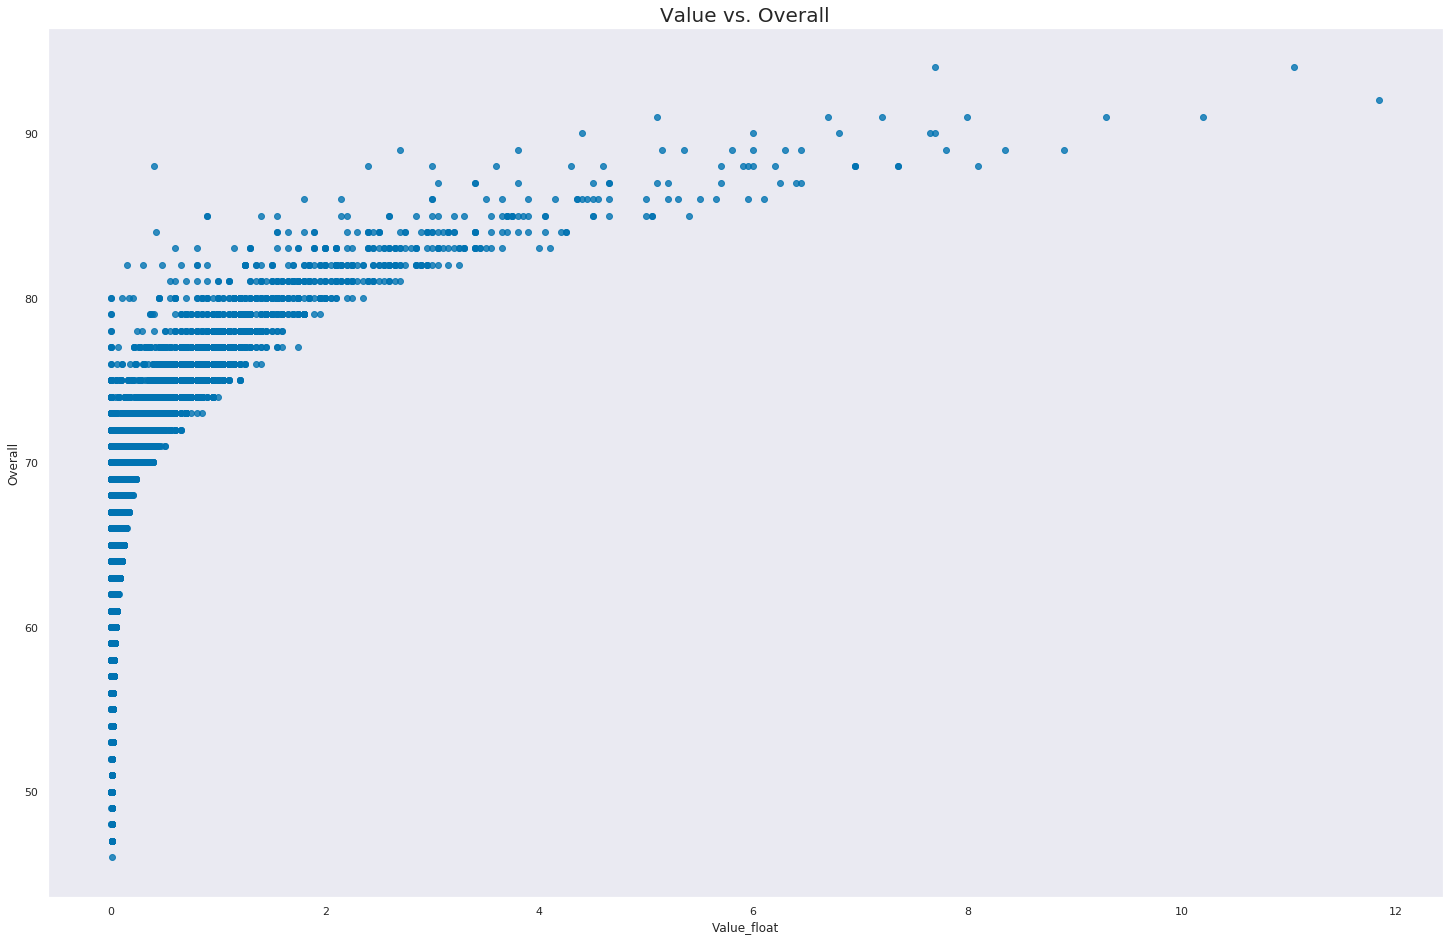

In [41]:
# Value vs. Overall
value = df.Value_float
ax = sns.regplot(x = value / 10000000, y = 'Overall', fit_reg = False, data = df);
ax.set_title(label='Value vs. Overall', fontsize=20);

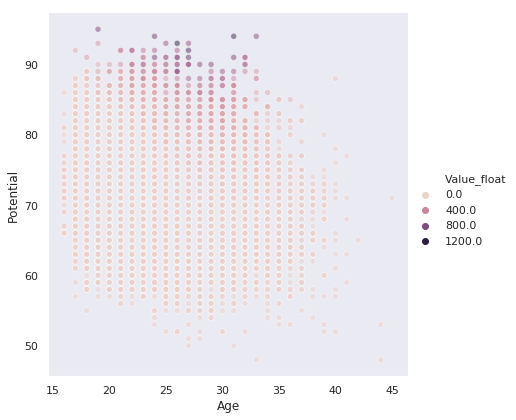

In [42]:
# Relation potential and age with respected value of players
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data=df);